In [1]:
from builtins import enumerate, print, range, sum
from scipy.io import loadmat, savemat
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import pylab 
import os

In [2]:
file_path = ["E:/data/day1/1", "E:/data/day1/2", "E:/data/day4/1", "E:/data/day4/2",
             "E:/data/day5/1", "E:/data/day5/2", "E:/data/day7/1", "E:/data/day7/2",
             "E:/data/day8/1", "E:/data/day8/2", "E:/data/day9/1", "E:/data/day9/2"]
n_samples = np.shape(file_path)[0]
pixelnum = 512

In [5]:
total_data = []
for index, path in enumerate(file_path):
    data = loadmat(path + "/data/new_invariant.mat")['new_invariant']
    nRows, nCols, nDim = data.shape
    data = data.reshape(data.shape[0]*data.shape[1],data.shape[2])
    nNums = nRows*nCols
    total_data.append(data)
total_data = np.concatenate(total_data, axis=0)
sampleNum = total_data.shape[0]

cluster = MiniBatchKMeans(n_clusters=pixelnum, batch_size=10 * pixelnum, n_init='auto', random_state=2021214521)
cluster.fit(total_data)
label = cluster.labels_

In [6]:
labels = np.zeros([nRows, nCols, n_samples])
for i in range(n_samples):
    labels[:,:,i] = label[i*nNums:(i+1)*nNums].reshape(nRows, nCols)
print(np.shape(labels))

(1861, 2271, 12)


In [63]:
for index, path in enumerate(file_path):
    m11 = loadmat(path+"/m11.mat")['CalibratedM11']
    nRows, nCols = np.shape(m11)
    locals()['label_sample_'+str(index)] = label[index*nNums:(index+1)*nNums].reshape(nRows, nCols)
    eval('label_sample_'+str(index))

(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)
(1861, 2271)


In [7]:
superpixel_num = []
for i in range(int(n_samples/2)):
    num = []
    for j in range(pixelnum):
        num.append(sum(label[2 * i * nNums : (2 * i + 2) * nNums] == j))
    superpixel_num = [*superpixel_num,[*num]]
superpixel_ratio = np.divide(superpixel_num, sampleNum)

In [84]:
basic = superpixel_ratio[0, :]
day4 = np.argsort(basic - superpixel_ratio[1, :])[::-1]
day5 = np.argsort(basic - superpixel_ratio[2, :])[::-1]
day7 = np.argsort(basic - superpixel_ratio[3, :])[::-1]
day8 = np.argsort(basic - superpixel_ratio[4, :])[::-1]
day9 = np.argsort(basic - superpixel_ratio[5, :])[::-1]

In [8]:
ratio_index = np.zeros([int(n_samples/2), pixelnum], dtype=int)
ratio_data = np.zeros([int(n_samples/2), pixelnum])
ratio_index[0, :] = superpixel_ratio[0, :]
ratio_data[0, :] = superpixel_ratio[0, :]
for i in range(1, int(n_samples/2)):
    ratio_index[i, :] = np.argsort(ratio_data[0, :] - superpixel_ratio[i, :])[::-1]
    ratio_data[i, :] = ratio_data[0, :] - superpixel_ratio[i, :]

In [17]:
sp_4 = np.flip(ratio_index[5,:])[:100]
print(sp_4)
temp = np.zeros([nRows,nCols])
m11 = loadmat(file_path[11]+"/m11.mat")['CalibratedM11']
path = file_path[11] + "/pic/"
if not os.path.exists(path):
    os.makedirs(path)
j=0
for i in sp_4:
    temp += labels[:,:,11]==i
    plt.figure()
    plt.imshow(m11,'gray')
    plt.imshow(temp,'RdBu',alpha=temp*0.7)
    plt.axis('off')
    plt.title(str(j))
    plt.savefig(path+str(j)+".jpg", bbox_inches='tight')
    plt.close()
    j+=1

[461 349  34 195  64  99 140  96 241 416 420 264  94 324 300  36 185  22
 444 451 253   0 197 440 104 133 252 126 294 475 281 376 277  56 379 431
 301 406 175 381 363 465   6  29 232 142 138  66 468 331  11 506 225 391
 498 260  65  30 408   1 401 190 311 460 168 425 352 343 105 463 245 306
  87 290 265  72 174 144 293 149 276 244 493 462 273  25 508 317 221 485
 202 215 182 179 198  73 302 435 434 488]


In [ ]:
print(np.argsort(ratio_data[1,:]))
print(np.flip(np.argsort(ratio_data[1,:])))

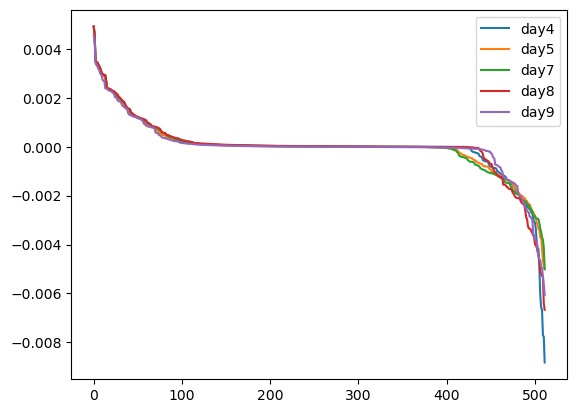

In [94]:
plt.plot((ratio_data[1, :])[ratio_index[1, :]], label='day4')
plt.plot((ratio_data[2, :])[ratio_index[2, :]], label='day5')
plt.plot((ratio_data[3, :])[ratio_index[3, :]], label='day7')
plt.plot((ratio_data[4, :])[ratio_index[4, :]], label='day8')
plt.plot((ratio_data[5, :])[ratio_index[5, :]], label='day9')
plt.legend(['day4', 'day5', 'day7', 'day8', 'day9'])
plt.savefig(path + 'superpixel_ratio.jpg', bbox_inches='tight')

In [59]:
print(day4)

[ 37 285 388  90 233 495 169 229 450 310 246 115 162 220  98 350 269 230
 210 213 288  86 384 489  27 228 163 122  79   3  74 284 134 470 158  68
 103 187 451 297 307 292 403 108 119 439 415 410 507 342 234 424 322 337
  78 395 446 419 358  24 313 107  32 116 458 188 301 399 496 124  34 173
 248 434 255 402 443 253 408   4 480 426 406 127 183 360 111 203 195 465
 367 355 147  64 334 204 329 474 423 333 283  75 279 154 275 362 420   1
 104  43 461 509 373 363 113 482 401 354 282 153 227  17 117   0 303 344
 416 370 455   6 277 349 197 457  50 425  30 374 295 247  83  97  48 318
 471 207 245 427 252 379 241 185 463 440 321 324 300 343 398 381  66 294
 232  36 133 328  40 138  96 298  23 281 346  71  94  35 168 501 142 341
 176  56 260 299 191 293 175 208  22 215  54 393 431  99 112 280 468 327
 502 140 237 371 444 442 475 438 348 155 174 376 400 190 311  29 198 144
  55 413 156 331 109 264 490 194 278  11 290 487  65 317 265  72 164 126
  60 382  44  92 306 130 488 182 506 243 372   8 47

In [45]:
a = [[1,2,3],[3,4,5],[4,5,6]]
b = np.divide(a, 2)
print(b)

[[0.5 1.  1.5]
 [1.5 2.  2.5]
 [2.  2.5 3. ]]


In [19]:
a = "e" + "-" + "ddd" + str(2)
print(a)

e-ddd2
